In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [98]:
# Load training dataset
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
data.shape

(891, 12)

In [100]:
# Load test dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
test_data.shape

(418, 11)

### Exploratory Data Analysis (EDA)

In [102]:
#Check missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

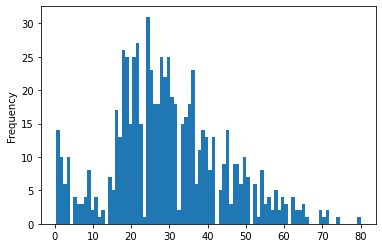

In [104]:
#Check age distribution
data['Age'].plot.hist(bins=data['Age'].nunique())

<AxesSubplot:ylabel='Age'>

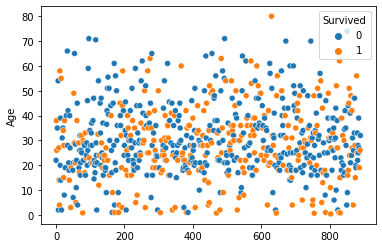

In [105]:
sns.scatterplot(data=data,x=data.index,y='Age',hue='Survived')

<AxesSubplot:ylabel='Frequency'>

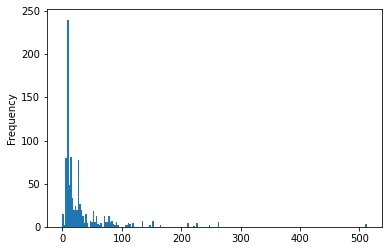

In [106]:
#Check fare distribution
data['Fare'].plot.hist(bins=200)

<AxesSubplot:ylabel='Fare'>

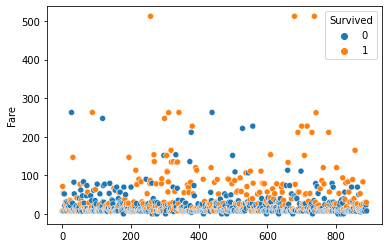

In [107]:
sns.scatterplot(data=data,x=data.index,y='Fare',hue='Survived')

5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


<AxesSubplot:xlabel='Sex', ylabel='Age'>

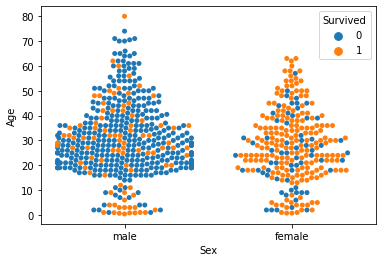

In [108]:
#Check survivial with respect to age and sex
sns.swarmplot(data=data, x='Sex',y='Age', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

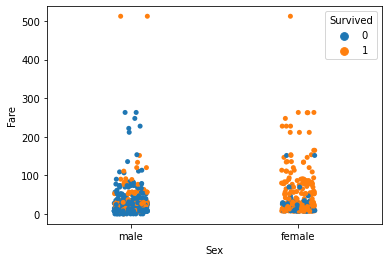

In [109]:
#Check survivial with respect to fare and sex
sns.stripplot(data=data, x='Sex',y='Fare', hue='Survived')

In [110]:
#Check correlation among numerical features
data[['Age','SibSp','Parch','Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

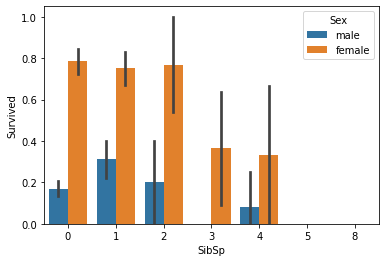

In [111]:
#Check Survival with respect to SibSp and sex
sns.barplot(data=data,x='SibSp',y='Survived',hue='Sex')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

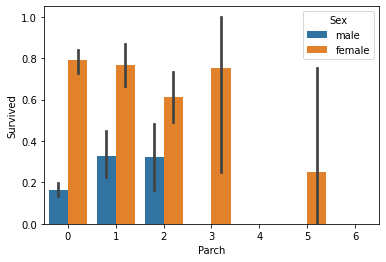

In [112]:
#Check Survival with respect to Parch and sex
sns.barplot(data=data,x='Parch',y='Survived',hue='Sex')

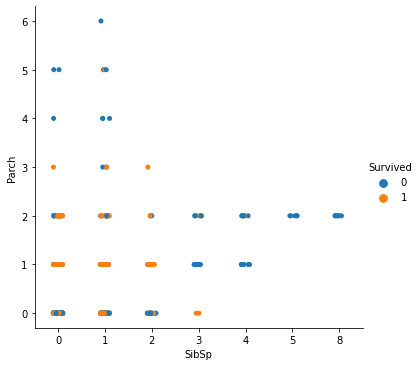

In [113]:
#Compare survival with respect to SibSp and Parch
sns.catplot(data=data, x='SibSp', y='Parch',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

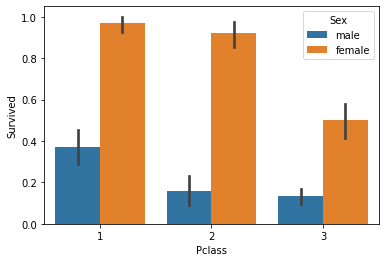

In [114]:
#Check survival with respect to Pclass and sex
sns.barplot(data=data,x='Pclass',y='Survived',hue='Sex')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

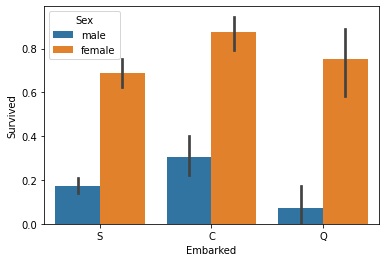

In [115]:
#Check survival with respect to embarked and sex
sns.barplot(data=data,x='Embarked',y='Survived',hue='Sex')

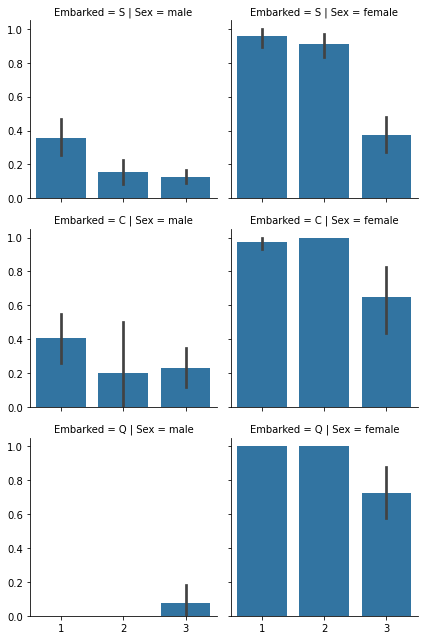

In [116]:
grid = sns.FacetGrid(data=data, row='Embarked', col='Sex')
grid.map_dataframe(sns.barplot,x='Pclass',y='Survived')

In [117]:
#Retrive the first letter of Cabin and replace missing value with 0
data['Cabin'] = data['Cabin'].str[:1]
data['Cabin'].fillna(0, inplace=True)

In [118]:
test_data['Cabin'] = test_data['Cabin'].str[:1]
test_data['Cabin'].fillna(0, inplace=True)

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

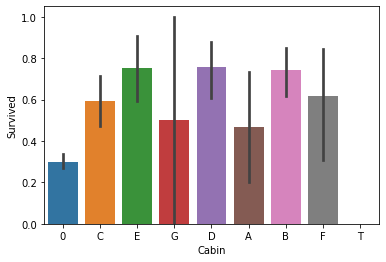

In [119]:
#Check survival rate of different cabin
sns.barplot(data=data,x='Cabin',y='Survived')

In [120]:
#Retrive title from Name
data['Title'] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Mme               1
Capt              1
Don               1
Ms                1
the Countess      1
Lady              1
Jonkheer          1
Name: Title, dtype: int64

In [121]:
#Check survival rate of different title
data.groupby(['Title'])['Survived'].mean().sort_values(ascending=False)

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

In [123]:
#Create a function to encode title
def title_rank(title):
    if title in ['Rev','Major','Capt']:
        return 0
    elif title in ['Mr','Don','Dr']:
        return 1
    elif title in ['Master']:
        return 2
    elif title in ['Mrs','Mme']:
        return 3
    elif title in ['Miss','Mlle','Ms','Col']:
        return 4
    elif title in ['the Countess','Jonkheer', 'Lady','Sir']:
        return 5
    else:
        return 1

data['Title'] = data['Title'].apply(title_rank)
test_data['Title'] = test_data['Title'].apply(title_rank)

In [124]:
# Check rows with missing values
data.loc[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,4
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,3


In [125]:
data['Embarked'] = data['Embarked'].replace('C','Ch')
test_data['Embarked'] = test_data['Embarked'].replace('C','Ch')

In [126]:
data.loc[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,0,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,0,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,0,Ch,3
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,0,Ch,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,0,Q,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,0,Ch,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,0,S,4
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,0,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,0,S,1


In [127]:
# Create a function to group passenger based on family size
data['FamilyCount'] = data['SibSp'] + data['Parch'] + 1

def familySize(data):
    if data == 1:
        return 'Singleton'
    elif data>1 and data <=4:
        return 'Small Family'
    else:
        return 'Large Family'

data['FamilySize'] = data['FamilyCount'].apply(familySize)
test_data['FamilyCount'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['FamilySize'] = test_data['FamilyCount'].apply(familySize)

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

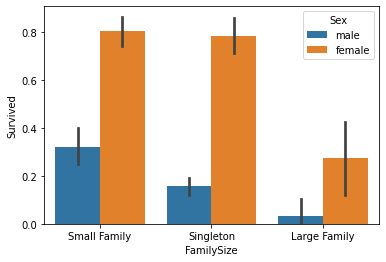

In [128]:
#Check survival rate of different family size
sns.barplot(data=data, x='FamilySize', y='Survived', hue='Sex')

In [129]:
# Create a column to indicate whether age is missing
def isNullAge(data):
    if pd.isna(data):
        return 1
    else:
        return 0

data['IsMissingAge'] = data['Age'].apply(isNullAge)
test_data['IsMissingAge'] = test_data['Age'].apply(isNullAge)

In [130]:
#Check median value of age for each sex and Pclass group
grouped = data.groupby(['Sex','Pclass'])['Age'].median()
grouped

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [131]:
#Impute missing values for age with median age from each sex-pclass group

for index,row in data.iterrows():
    if pd.isna(row['Age']):
        data.loc[index, 'Age'] = grouped[row['Sex']][row['Pclass']]
    else:
        pass


for index,row in test_data.iterrows():
    if pd.isna(row['Age']):
        test_data.loc[index, 'Age'] = grouped[row['Sex']][row['Pclass']]
    else:
        pass

In [132]:
#Impute missing values for fare (mean) and embarked (mode)

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())


In [133]:
#Drop unwanted columns
df = data.drop(columns=['Name', 'Ticket','SibSp','Parch','FamilyCount'])
df_test = test_data.drop(columns=['Name', 'Ticket','SibSp','Parch','FamilyCount'])

In [134]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsMissingAge
0,1,0,3,male,22.0,7.2500,0,S,1,Small Family,0
1,2,1,1,female,38.0,71.2833,C,Ch,3,Small Family,0
2,3,1,3,female,26.0,7.9250,0,S,4,Singleton,0
3,4,1,1,female,35.0,53.1000,C,S,3,Small Family,0
4,5,0,3,male,35.0,8.0500,0,S,1,Singleton,0


### Feature Scaling and Transformation

In [135]:
#Data Standardization for Age and Fare

scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Fare'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1))

df_test['Age'] = scaler.transform(df_test['Age'].values.reshape(-1, 1))
df_test['Fare'] = scaler.transform(df_test['Fare'].values.reshape(-1, 1))


In [136]:
#Label encode Sex & FamilySize column
df['Sex'] = df['Sex'].replace({'male':1,'female':0})
df['FamilySize'] = df['FamilySize'].replace({'Singleton':0,'Small Family':1,'Large Family':2})

df_test['Sex'] = df_test['Sex'].replace({'male':1,'female':0})
df_test['FamilySize'] = df_test['FamilySize'].replace({'Singleton':0,'Small Family':1,'Large Family':2})

In [137]:
#One hot encode Embarked & Cabin columns
df['Cabin'] = df['Cabin'].astype('str')
enc = OneHotEncoder(sparse=False)
ohe= enc.fit_transform(df[['Embarked','Cabin']])
embarked_cols = np.sort(df['Embarked'].unique())
cabin_cols = np.sort(df['Cabin'].unique())
col_names = np.concatenate([embarked_cols,cabin_cols])

ohe_df = pd.DataFrame(ohe, columns=col_names)


In [138]:
#One hot encoding for test set
df_test['Cabin'] = df_test['Cabin'].astype('str')
ohe_test= enc.transform(df_test[['Embarked','Cabin']])
ohe_testdf = pd.DataFrame(ohe_test, columns=col_names)

In [139]:
ohe_df = ohe_df.astype('int32')
ohe_testdf = ohe_testdf.astype('int32')
ohe_df

,Ch,Q,S,0,A,B,C,D,E,F,G,T
0,0,0,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,1,0,0,0,0,0,0,0,0
887,0,0,1,0,0,1,0,0,0,0,0,0
888,0,0,1,1,0,0,0,0,0,0,0,0
889,1,0,0,0,0,0,1,0,0,0,0,0


In [140]:
df.drop(columns=['Embarked','Cabin'], inplace=True)
df_test.drop(columns=['Embarked','Cabin'], inplace=True)

In [141]:
df = pd.concat([df,ohe_df], axis=1)
df_test = pd.concat([df_test,ohe_testdf], axis=1)

In [142]:
df.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)

In [143]:
target = df.pop('Survived')

In [144]:
# Create new feature i.e. Age*Class
df['Age*Class'] = df['Age']*df['Pclass']
df_test['Age*Class'] = df_test['Age']*df_test['Pclass']

In [145]:
df.head()

,Pclass,Sex,Age,Fare,Title,FamilySize,IsMissingAge,Ch,Q,S,0,A,B,C,D,E,F,G,T,Age*Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,3,1,-0.534891,-0.502445,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,-1.604673
2,1,0,0.668392,0.786845,3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0.668392
3,3,0,-0.234070,-0.488854,4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,-0.702211
4,1,0,0.442776,0.420730,3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.442776
5,3,1,0.442776,-0.486337,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1.328329


### Modelling

In [146]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=10,stratify=target)


#### Model 1: XGBoost

In [147]:
model1 = XGBClassifier(learning_rate=0.06, reg_lambda=1, max_depth=6,objective='binary:logistic',n_estimators=100)
model1.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [148]:
# Accuracy on training set
accuracy_score(y_train, model1.predict(x_train))

0.9181380417335474

In [149]:
# Accuracy on test set
accuracy_score(y_test, model1.predict(x_test))

0.835820895522388

#### Model 2: Logistic Regression

In [219]:
model2 = LogisticRegression(C=0.4)
model2.fit(x_train, y_train)

LogisticRegression(C=0.4)

In [220]:
# Accuracy on training set
accuracy_score(y_train, model2.predict(x_train))

0.8234349919743178

In [221]:
# Accuracy on test set
accuracy_score(y_test, model2.predict(x_test))

0.7910447761194029

#### Model 3: Support Vector Machine (SVM)

In [222]:
model3 = SVC(C=0.5)
model3.fit(x_train, y_train)

SVC(C=0.5)

In [223]:
# Accuracy on training set
accuracy_score(y_train, model3.predict(x_train))

0.8186195826645265

In [224]:
# Accuracy on test set
accuracy_score(y_test, model3.predict(x_test))

0.8022388059701493

#### Model 4: KNN

In [225]:
model4 = KNeighborsClassifier(n_neighbors=8,weights='uniform')
model4.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [226]:
# Accuracy on training set
accuracy_score(y_train, model4.predict(x_train))

0.8346709470304976

In [227]:
# Accuracy on test set
accuracy_score(y_test, model4.predict(x_test))

0.7835820895522388

#### Model 5: Random Forest

In [150]:
model5 = RandomForestClassifier(min_samples_split=10, n_estimators=100, n_jobs=-1,oob_score=True, random_state=1)
model5.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10, n_jobs=-1, oob_score=True,
                       random_state=1)

In [151]:
# Accuracy on training set
accuracy_score(y_train, model5.predict(x_train))

0.9020866773675762

In [152]:
# Accuracy on test set
accuracy_score(y_test, model5.predict(x_test))

0.8395522388059702

#### Analysis of Features Importance

In [153]:
# Ranking important features by Permutation Importance
perm = PermutationImportance(model5, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.1052 ± 0.0202,Title
0.0478 ± 0.0119,Sex
0.0410 ± 0.0149,Pclass
0.0201 ± 0.0138,Age
0.0194 ± 0.0056,FamilySize
0.0142 ± 0.0128,Age*Class
0.0097 ± 0.0174,Fare
0.0037 ± 0.0047,Q
0.0030 ± 0.0030,E
0.0030 ± 0.0056,C


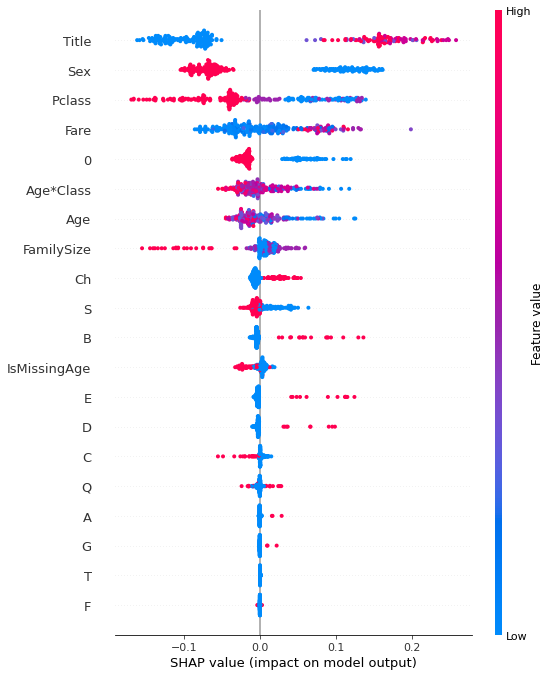

In [154]:
#  Shapley summary plot
explainer = shap.TreeExplainer(model5)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1],x_test)

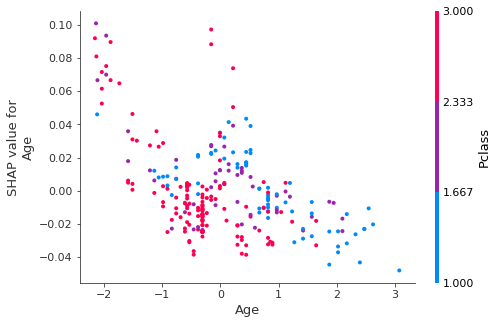

In [70]:
shap.dependence_plot("Age",shap_values[1],x_test,interaction_index="Pclass")

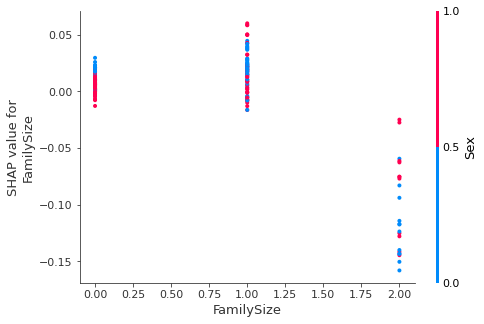

In [71]:
shap.dependence_plot("FamilySize",shap_values[1],x_test,interaction_index="Sex")

#### Hyper parameter tuning with RandomForest

In [155]:
estimator = RandomForestClassifier(
    max_features='auto', 
    oob_score=True, 
    random_state=1, 
    n_jobs=-1
)

params = { "criterion" : ["gini", "entropy"], 
          "min_samples_leaf" : [1, 5, 10], 
          "min_samples_split" : [2, 4, 10, 12, 16], 
          "n_estimators": [50, 100, 400, 700, 1000]}

In [156]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=params,
    scoring = 'f1_weighted',
    n_jobs = 10,
    cv = 9,
    verbose=True
)

In [157]:
grid_search.fit(df, target)

Fitting 9 folds for each of 150 candidates, totalling 1350 fits


GridSearchCV(cv=9,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             scoring='f1_weighted', verbose=True)

In [159]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_split=10, n_jobs=-1, oob_score=True,
                       random_state=1)

In [160]:
grid_search.best_estimator_.score(x_test,y_test)

0.9216417910447762

In [161]:
y_pred = grid_search.best_estimator_.predict(x_test)

### Model Evaluation

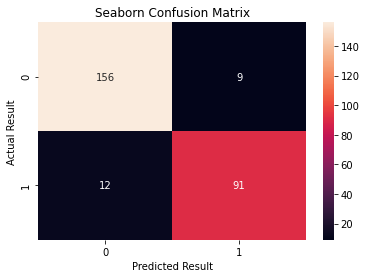

In [162]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Seaborn Confusion Matrix');
ax.set_xlabel('Predicted Result')
ax.set_ylabel('Actual Result');

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       165
           1       0.91      0.88      0.90       103

    accuracy                           0.92       268
   macro avg       0.92      0.91      0.92       268
weighted avg       0.92      0.92      0.92       268



### Evaluate on test dataset

In [169]:
# Model Prediction
prediction = grid_search.best_estimator_.predict(df_test)
print(prediction)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 0 1 1 0 0 1 0 0 1]


### Export File for submission

In [170]:
submission = pd.DataFrame({'PassengerId':df_test.index, 'Survived':prediction})

In [171]:
submission.to_csv('titanic_submission.csv', index=False)